In [4]:
import pandas as pd
house_value = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')

In [6]:
house_value[house_value["Metro"] == "New York"]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1321,1336,1345,1346,1343,1345,1340.0,1327.0,1317.0,1313.0
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1618,1636,1654,1656,1647,1640,1645.0,1643.0,1630.0,1616.0
5,61616,10002,New York,NY,New York,New York,6,NaN,NaN,NaN,...,1354,1369,1387,1392,1385,1385,1390.0,1390.0,1397.0,1409.0
10,62037,11226,New York,NY,New York,Kings,11,NaN,NaN,NaN,...,497,501,508,517,522,522,522.0,523.0,525.0,527.0
12,62087,11375,New York,NY,New York,Queens,13,NaN,NaN,NaN,...,530,535,541,548,556,564,569.0,575.0,583.0,590.0
14,62045,11235,New York,NY,New York,Kings,15,NaN,NaN,NaN,...,504,503,504,508,513,514,515.0,515.0,515.0,516.0
19,61623,10009,New York,NY,New York,New York,20,NaN,NaN,NaN,...,1388,1401,1416,1425,1428,1438,1447.0,1447.0,1449.0,1456.0
21,61643,10029,New York,NY,New York,New York,22,NaN,NaN,NaN,...,969,987,1005,1012,1008,1008,1015.0,1027.0,1044.0,1059.0
22,61703,10128,New York,NY,New York,New York,23,NaN,NaN,NaN,...,1195,1216,1239,1249,1246,1243,1247.0,1251.0,1257.0,1262.0
28,61802,10462,New York,NY,New York,Bronx,29,NaN,NaN,NaN,...,164,167,170,173,174,173,172.0,171.0,175.0,178.0


In [22]:
ny_housedf = house_value[house_value['City'] == 'New York']
month_format = '{year}-{month:02}'
cols = []
for year in range(2014,2017):
    for month in range(1,13):
        cols.append(month_format.format(year=year, month=month))
cols

['2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12']

In [8]:
used_cols = ['RegionName']
used_cols.extend(cols)
df = ny_housedf[used_cols]



In [9]:
plotdata = [row for row in df.values]


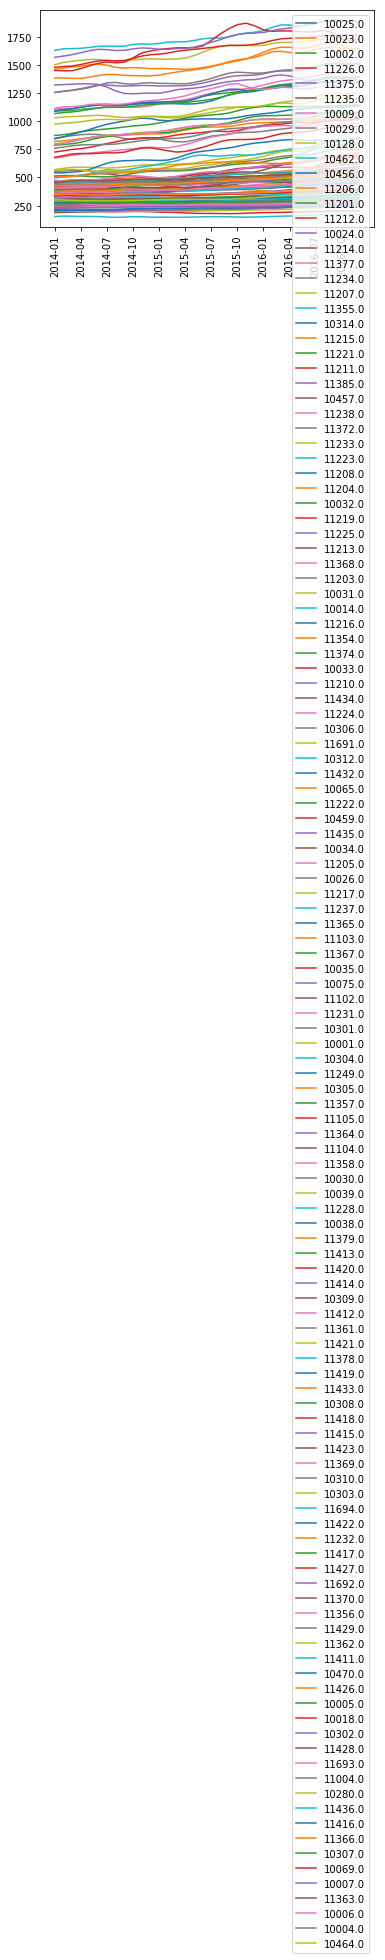

In [10]:
import matplotlib.pyplot as plt
def plot_line(pdata):
    plt.plot(pdata[1:])
    plt.xticks(range(0,len(cols),3), cols[::3], rotation='vertical')
map(plot_line, plotdata)
plt.legend([region[0] for region in plotdata],)
plt.show()

In [27]:
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import cross_val_score
VALIDATE = False
test_months = 25
def predict(row):
    y = np.array(row[1:test_months+1])
    X = np.arange(test_months)
    
    svr_rbf = SVR(kernel='rbf',C=1e3, gamma=0.005, epsilon=0.02)
    X= X.reshape(-1,1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    Xn = np.arange(len(cols)).reshape(-1,1)
    y_rbf = svr_rbf.fit(X, y).predict(Xn)
    y_lin = svr_lin.fit(X, y).predict(Xn)
    y_poly = svr_poly.fit(X, y).predict(Xn)
    
    #Validate the model
    if VALIDATE:
        scores = cross_val_score(clf, X, y, cv=5)
        return [y_lin, y_poly, y_rbf, scores]
    return [y_lin, y_poly, y_rbf]

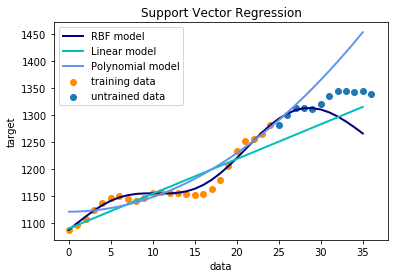

In [21]:
lw = 2
plt.scatter(X, y, color='darkorange', label='training data')
plt.scatter(range(test_months, len(cols)+1), plotdata[0][test_months:], label='untrained data')
# plt.hold('on')
plt.plot(Xn, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(Xn, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(Xn, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [26]:
for x in [y_lin, y_poly, y_rbf, cols, y]:
    print len(x)


36
36
36
36
25


37

In [ ]:
res = { "zip": 0, "data": [], "lin": [], "poly": [], "rbf": []}
exp = []
for row in plotdata:
    res["zip"] = row[0]
    res["data"] = row[1:]
    [ res["lin"], res["poly"], res["rbf"] ] = predict(row)
    exp.append(res)